# Speech Processing Lab



## 1.Analysis of an audio file 
 
 By Mohamed Essam

In [10]:
#import packages

import librosa

In [12]:
#!pip install librosa

In [13]:
#load the file
audio_path='00b01445_nohash_0.wav'
sample,sample_rate=librosa.load(audio_path)

This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.

In [14]:
#playing an audio file
import IPython.display as ipd
ipd.Audio(audio_path)

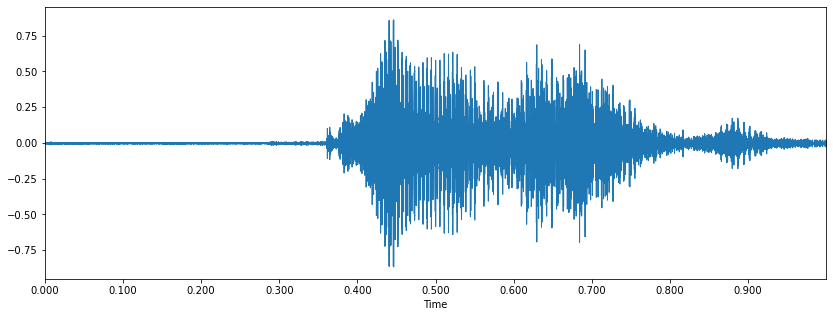

In [15]:
#visualizing the audio wave form
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveplot(sample,sr=sample_rate)


## Creating an audio signal

Let us now create an audio signal at 220Hz. We know an audio signal is a numpy array, so we shall create one and pass it on to the audio function.



In [16]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 H

**linspace** is a tool in Python for creating numeric sequences. It's somewhat similar to the NumPy arange function, in that it creates sequences of evenly spaced numbers structured as a NumPy array

In [18]:
#playing an audio file
import IPython.display as ipd
ipd.Audio(x, rate=sr) # load a NumPy array

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

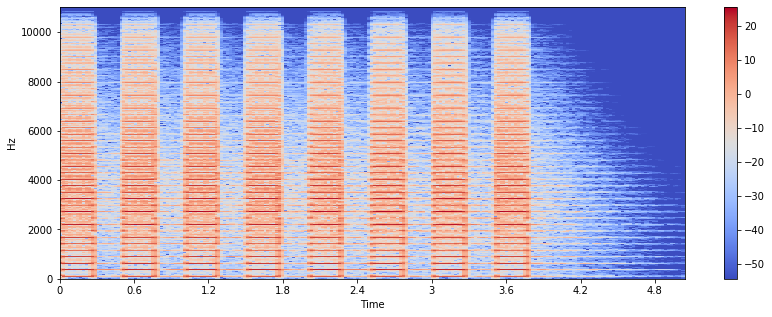

In [27]:
#Spectograms
import numpy as np
Sample=librosa.stft(sample)# STFT of x
xdb= librosa.amplitude_to_db(np.abs(Sample))
plt.figure(figsize=(14,5))
librosa.display.specshow(xdb,sr=sample_rate,x_axis='time',y_axis='hz')
plt.colorbar()

.stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. .specshow is used to display a spectrogram.

The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

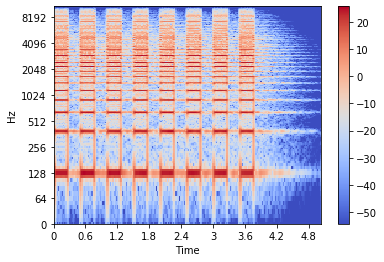

In [29]:
librosa.display.specshow(xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

### Try to write a new output file with changine the sample rate

In [31]:
#Saving the audio
librosa.output.write_wav('newaudio.wav', Sample, sample_rate)
librosa.output.write_wav('newaudio.wav', Sample, 44100)

AttributeError: module 'librosa' has no attribute 'output'

### if the output module of librosa.output.write_wav doesn't work you can use 

In [45]:
import numpy as np
import soundfile as sf
sf.write('alarm2.wav', sample, sample_rate)
sf.write('alarm2.wav', sample, 44100)
#sf.write('F:\stereo_file.wav', np.random.randn(10, 2), 44100, 'PCM_24')

## for more details check

https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html